# TriMeshes and the Octopants Landscape



In [2]:
import matplotlib.pyplot as plt
import numpy as np

from quagmire import tools as meshtools
%matplotlib inline

## TriMesh



In [3]:
from quagmire import QuagMesh 
from quagmire import QuagMesh # all routines we need are within this class
from quagmire import QuagMesh

minX, maxX = -5.0, 5.0
minY, maxY = -5.0, 5.0,

spacingX = 0.05
spacingY = 0.05

x, y, simplices = meshtools.elliptical_mesh(minX, maxX, minY, maxY, spacingX, spacingY, 1.)

DM = meshtools.create_DMPlex(x, y, simplices)
DM = meshtools.refine_DM(DM, refinement_levels=2)

mesh = QuagMesh(DM)

print( "\nNumber of points in the triangulation: {}".format(mesh.npoints))

0 - Delaunay triangulation 0.6443209900000042s
0 - Calculate node weights and area 0.035529242999999155s
0 - Find boundaries 0.0044822439999947505s
0 - cKDTree 0.026070704999995087s
0 - Construct neighbour cloud array 0.8483339620000052s
0 - Construct rbf weights 0.18701980900000592s

Number of points in the triangulation: 156925


In [5]:
x = mesh.coords[:,0]
y = mesh.coords[:,1]
bmask = mesh.bmask

radius  = np.sqrt((x**2 + y**2))
theta   = np.arctan2(y,x)

height  = np.exp(-0.025*(x**2 + y**2)**2) + 0.25 * (0.2*radius)**4  * np.cos(10.0*theta)**2 ## Less so
height  += 0.5 * (1.0-0.2*radius)

rainfall = np.ones_like(height)
rainfall[np.where( radius > 5.0)] = 0.0 

mesh.downhill_neighbours = 2
with mesh.deform_topography():
    mesh.topography.data = height

0 - Build downhill matrices 0.4679882470000081s
0 - Build upstream areas 0.5275511180000052s


In [6]:
mo1 = mesh.identify_outflow_points()
i = np.argsort(theta[mo1])
outflows = mo1[i]

In [8]:
mesh.downhill_neighbours = 2
with mesh.deform_topography():
    mesh.topography.data = height
flowpaths = mesh.cumulative_flow(rainfall*mesh.area)
logpaths = np.log10(flowpaths)
sqrtpaths = np.sqrt(flowpaths)

mesh.downhill_neighbours = 3
with mesh.deform_topography():
    mesh.topography.data = height

flowpaths3 = mesh.cumulative_flow(rainfall*mesh.area)
logpaths3 = np.log10(flowpaths3)
sqrtpaths3 = np.sqrt(flowpaths3)

mesh.downhill_neighbours = 1
with mesh.deform_topography():
    mesh.topography.data = height
    
flowpaths1 = mesh.cumulative_flow(rainfall*mesh.area)
logpaths1 = np.log10(flowpaths1)
sqrtpaths1 = np.sqrt(flowpaths1)


0 - Build downhill matrices 0.4966487430000086s
0 - Build upstream areas 0.6529076620000183s


/Users/lmoresi/opt/anaconda3/envs/quagmire_gdal/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


0 - Build downhill matrices 0.5983708480000018s
0 - Build upstream areas 0.681993341000009s


/Users/lmoresi/opt/anaconda3/envs/quagmire_gdal/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


0 - Build downhill matrices 0.39325731699997846s
0 - Build upstream areas 0.32811825399997474s


/Users/lmoresi/opt/anaconda3/envs/quagmire_gdal/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


In [9]:
# Choose a scale to plot all six flow results
fmax = 1.0

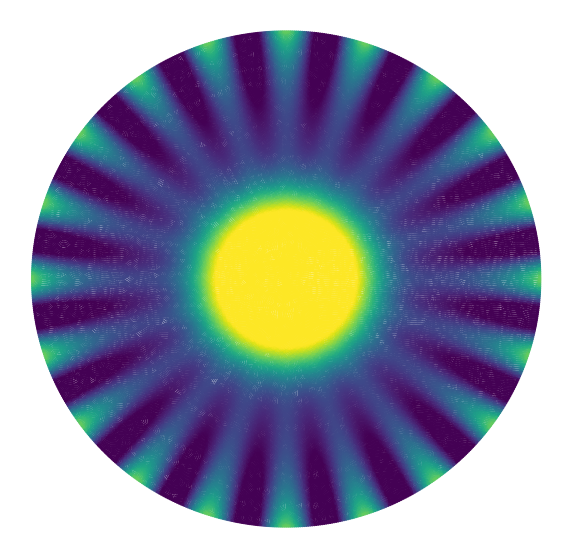

In [11]:
from scipy import ndimage

fig = plt.figure(1, figsize=(10.0, 10.0))
ax = fig.add_subplot(111)
ax.axis('off')
sc = ax.scatter(x[bmask], y[bmask], s=1, c=mesh.topography.data[bmask], vmin=0.0, vmax=1.0)
sc = ax.scatter(x[~bmask], y[~bmask], s=5, c=mesh.topography.data[~bmask], vmin=0.0, vmax=1.0)

# fig.colorbar(sc, ax=ax, label='height')
plt.show()

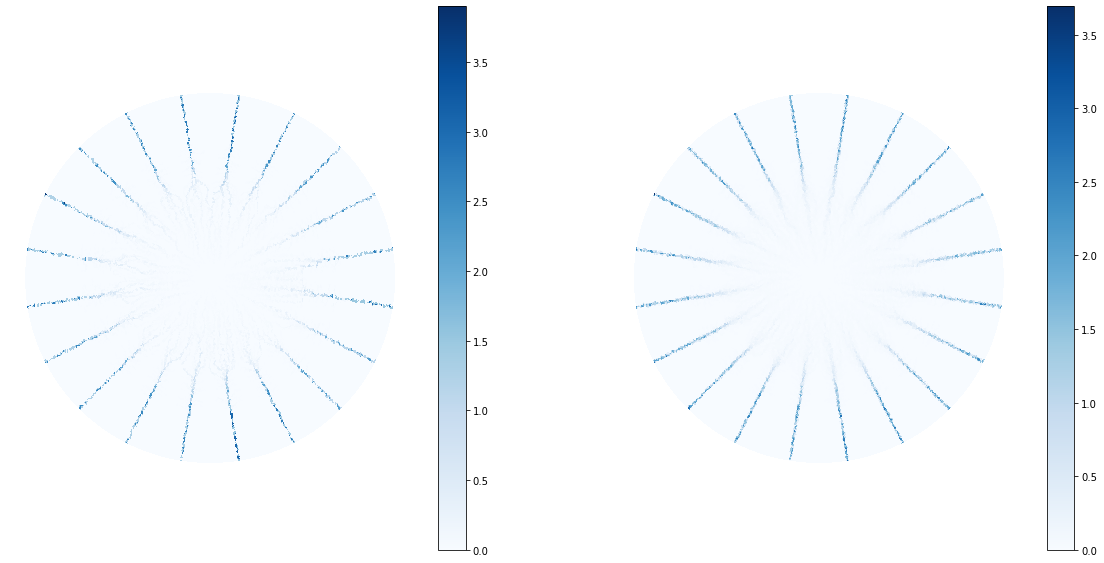

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
for ax in [ax1, ax2]:
    ax.axis('equal')
    ax.axis('off')
    
    
im1 = ax1.tripcolor(x, y, mesh.tri.simplices, flowpaths1 ,     cmap='Blues')
im2 = ax2.tripcolor(x, y, mesh.tri.simplices, flowpaths,       cmap="Blues")

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
plt.show()